In [12]:
import pandas as pd

file_path = '/home/agusitn/Documents/projects/blue-dollar-ml/data/processed/blue_data_clean.csv'

df = pd.read_csv(file_path, index_col='fecha', parse_dates=True)

df.head()


,valor
fecha,
2000-05-24,1.0005
2000-05-25,1.0005
2000-05-26,1.0004
2000-05-29,1.0007
2000-05-30,1.0009


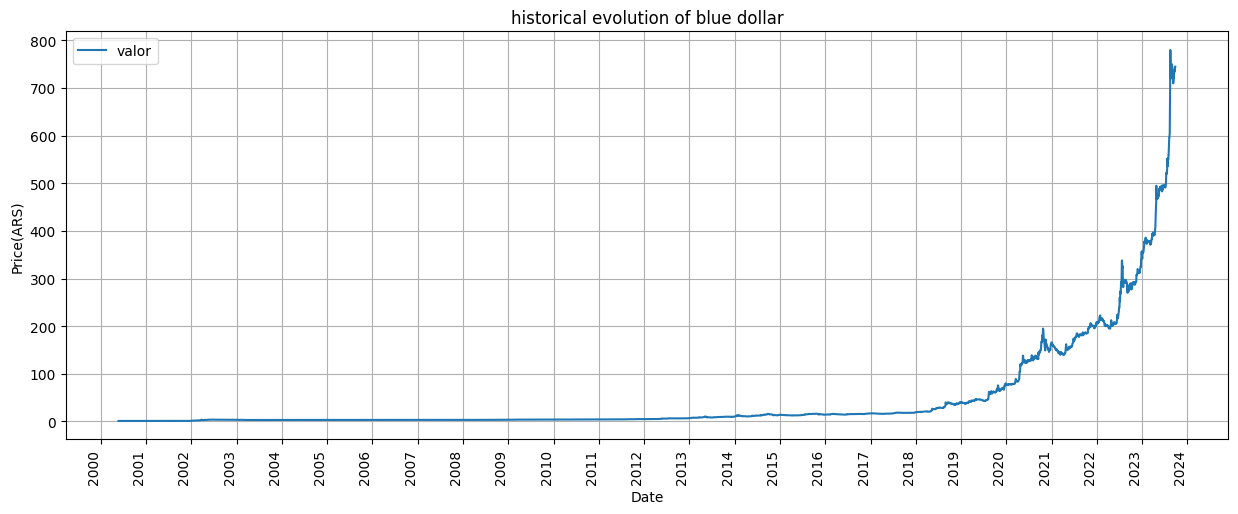

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#create graphic
ax = df.plot(figsize=(15,6), title="historical evolution of blue dollar")

ax.xaxis.set_major_locator(mdates.YearLocator(1))

#aesthetics
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Price(ARS)')
plt.grid(True)

plt.show()

In [14]:
import pandas as pd

df['delta'] = df['valor'].diff()
df['returns'] = df['valor'].pct_change()

df.head()

,valor,delta,returns
fecha,,,
2000-05-24,1.0005,NaN,NaN
2000-05-25,1.0005,0.0000,0.0000
2000-05-26,1.0004,-0.0001,-0.0001
2000-05-29,1.0007,0.0003,0.0003
2000-05-30,1.0009,0.0002,0.0002


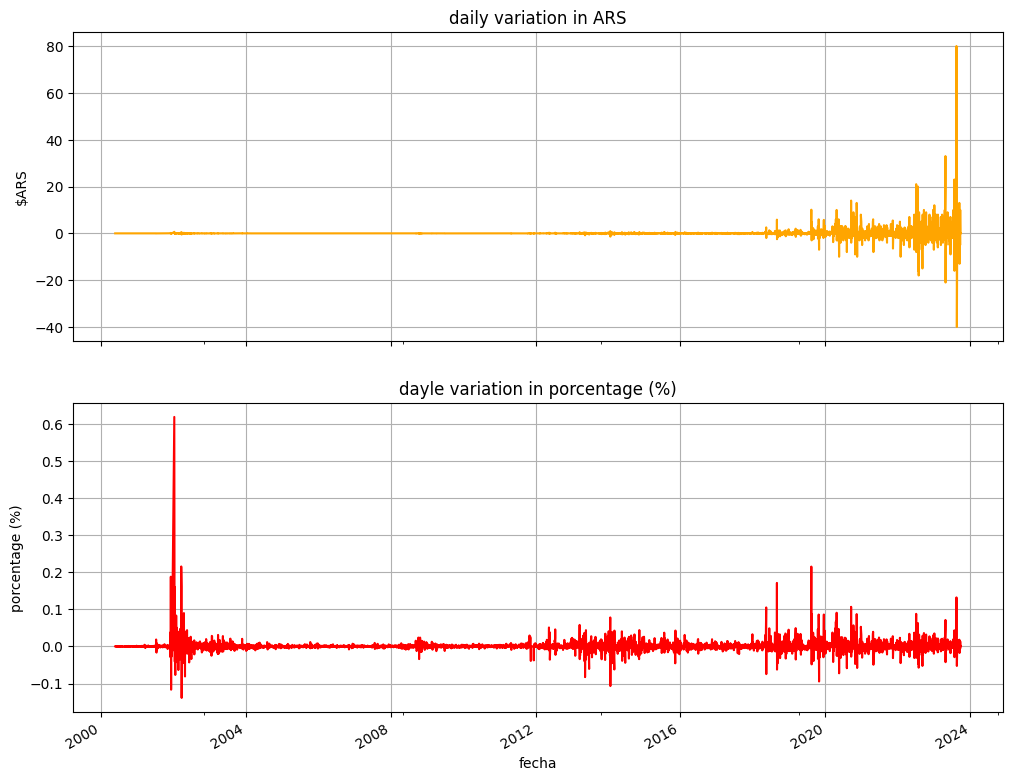

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)

df['delta'].plot(ax=ax1, color='orange')
ax1.set_title("daily variation in ARS")
ax1.set_ylabel('$ARS')
ax1.grid(True)

df['returns'].plot(ax=ax2, color='red')
ax2.set_title("dayle variation in porcentage (%)")
ax2.set_ylabel('porcentage (%)')
ax2.grid(True)

plt.show()

In [16]:
import pandas as pd

record_date = df['returns'].idxmax()
record_value = df['returns'].max()

print(f'El año con mayor aumento del dolar blue fue: {record_date}')
print(f'El porcentaje fue: {record_value}')

El año con mayor aumento del dolar blue fue: 2002-01-11 00:00:00
El porcentaje fue: 0.6190476190476188


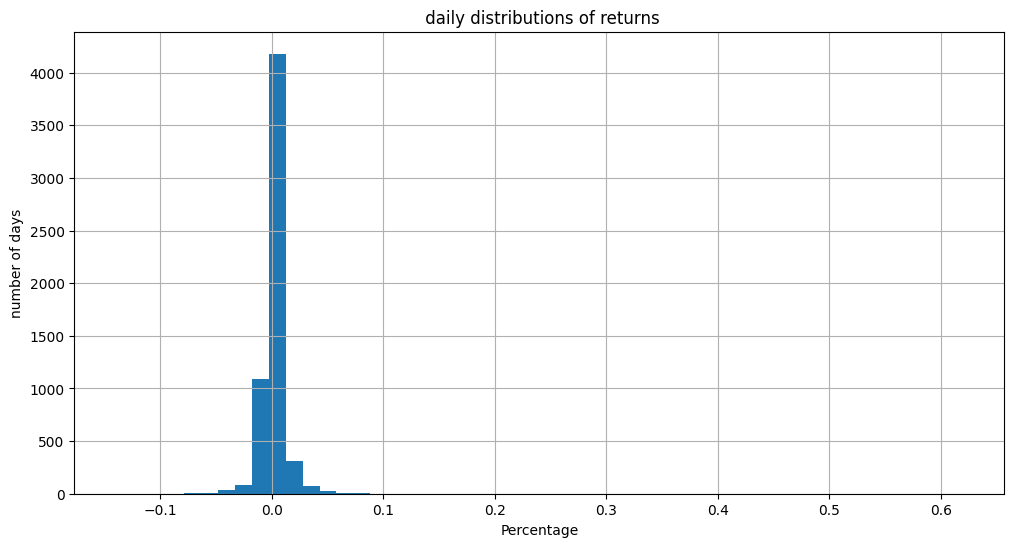

'\nNotas: \n- El Pico Central: Una barra muy alta en el 0 (o cerca). Eso te dice que la gran mayoría de los días, el dólar blue no se mueve mucho.\n- La "Cola" a la Derecha: Verás que el gráfico se estira hacia la derecha. Esos son los días de crisis o devaluaciones fuertes. En finanzas, esto se llama "Right Skew" (sesgo a la derecha).\n- La falta de Izquierda: Verás que casi no hay nada a la izquierda del cero. Esto confirma algo que todo argentino sabe: el dólar blue casi nunca baja de precio de forma significativa.\n'

In [17]:
import matplotlib.pyplot as plt

df['returns'].plot(kind='hist', bins=50, figsize=(12,6), title=" daily distributions of returns")

plt.xlabel("Percentage")
plt.ylabel("number of days")
plt.grid(True)

plt.show()

"""
Notas: 
- El Pico Central: Una barra muy alta en el 0 (o cerca). Eso te dice que la gran mayoría de los días, el dólar blue no se mueve mucho.
- La "Cola" a la Derecha: Verás que el gráfico se estira hacia la derecha. Esos son los días de crisis o devaluaciones fuertes. En finanzas, esto se llama "Right Skew" (sesgo a la derecha).
- La falta de Izquierda: Verás que casi no hay nada a la izquierda del cero. Esto confirma algo que todo argentino sabe: el dólar blue casi nunca baja de precio de forma significativa.
"""

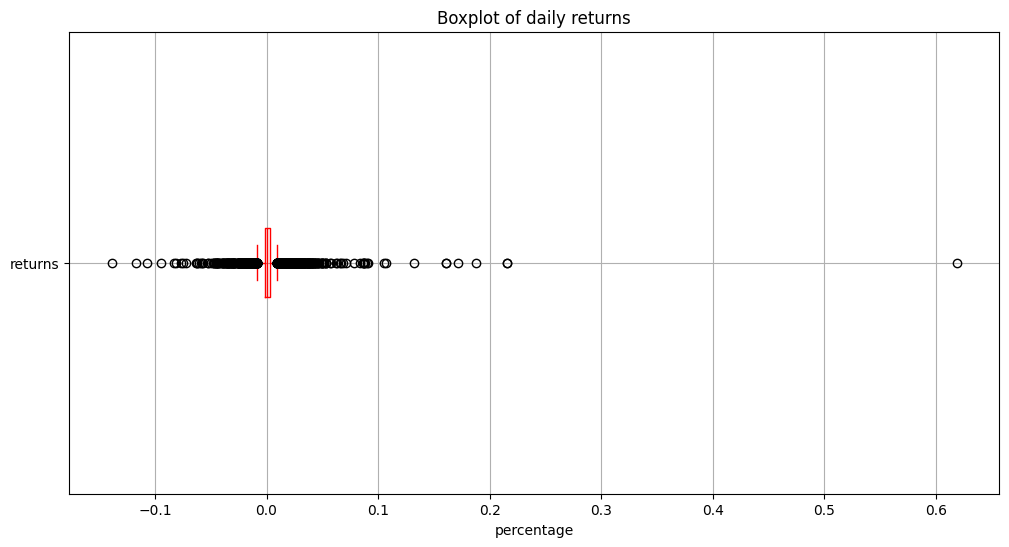

'\ncaja muy apretada cerca del 0 (porque la mayoría de los días el dólar no se mueve mucho).\nPero vas a ver muchos puntos negros (outliers) hacia la derecha.\nCada uno de esos puntos es un día donde el dólar saltó muchísimo más de lo normal.\n'

In [18]:
import matplotlib.pyplot as plt 

df.boxplot(column='returns', vert=False, figsize=(12,6), color='red')

plt.title("Boxplot of daily returns")
plt.xlabel("percentage")

plt.show()

"""
caja muy apretada cerca del 0 (porque la mayoría de los días el dólar no se mueve mucho).
Pero vas a ver muchos puntos negros (outliers) hacia la derecha.
Cada uno de esos puntos es un día donde el dólar saltó muchísimo más de lo normal.
"""

In [19]:
filter_crisis = df['returns'] > 0.10

crazy_days = df[filter_crisis].copy()

ranking_crisis = crazy_days.sort_values(by='returns', ascending=False)

print("--- TOP 10 DIAS DE MAYOR DEVALUACION --- ")
print((ranking_crisis['returns']*100).head(10))

--- TOP 10 DIAS DE MAYOR DEVALUACION --- 
fecha
2002-01-11    61.904762
2002-03-22    21.568627
2019-08-12    21.535181
2001-12-07    18.811881
2018-08-30    17.130307
2002-03-25    16.129032
2002-01-15    16.071429
2023-08-14    13.223140
2020-09-16    10.687023
2018-05-14    10.515464
Name: returns, dtype: float64


In [20]:
# 1. Contar cuántos datos faltan por columna
print("--- Cantidad de datos nulos por columna ---")
print(df.isna().sum())

# 2. Ver filas específicas que tienen algún dato faltante
filas_con_nulos = df[df.isna().any(axis=1)]

print("\n--- Primeras filas con datos faltantes ---")
print(filas_con_nulos.head())

# Verificamos si hay fechas repetidas en el índice
duplicados_fecha = df.index.duplicated().sum()

print(f"\nCantidad de fechas duplicadas: {duplicados_fecha}")

if duplicados_fecha > 0:
    print("Muestra de fechas duplicadas:")
    print(df[df.index.duplicated()].head())

--- Cantidad de datos nulos por columna ---
valor      0
delta      1
returns    1
dtype: int64

--- Primeras filas con datos faltantes ---
             valor  delta  returns
fecha                             
2000-05-24  1.0005    NaN      NaN

Cantidad de fechas duplicadas: 0


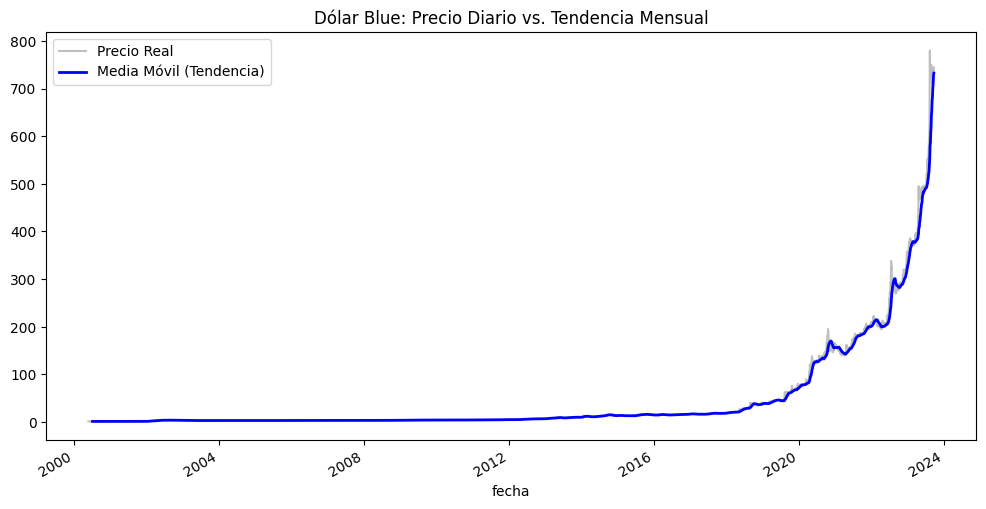

In [21]:
import matplotlib.pyplot as plt

# 1. Calculamos la Media Móvil de 30 días
# "Toma los últimos 30 datos y saca el promedio"
df['promedio_30_dias'] = df['valor'].rolling(window=30).mean()

# 2. Graficamos para comparar
plt.figure(figsize=(12, 6))

# El precio real (con transparencia alpha=0.5 para que se vea más suave)
df['valor'].plot(label='Precio Real', alpha=0.5, color='gray')

# La media móvil (Línea sólida)
df['promedio_30_dias'].plot(label='Media Móvil (Tendencia)', color='blue', linewidth=2)

plt.title('Dólar Blue: Precio Diario vs. Tendencia Mensual')
plt.legend()
plt.show()

In [ ]:
""" 
De esta forma voy a dividir los datos en dos clases:
Sube el dolar o baja el dolar
Siendo 1 como que el dolar sube y 0 el dolar baja 
"""

df['target_up'] = (df['returns'] > 0).astype(int)
print(df[['returns','target_up']].tail())

             returns  target_up
fecha                          
2023-09-19  0.002710          1
2023-09-20 -0.006757          0
2023-09-21  0.013605          1
2023-09-22  0.000000          0
2023-09-25  0.000000          0
